In [1]:
import numpy as np
import pandas as pd
import json

## Load the Lending Club dataset

### 1. Load the dataset into a data frame named loans

In [2]:
loans = pd.read_csv('lending-club-data.csv')
loans.head(2)

C:\Users\SSQ\AppData\Roaming\Python\Python27\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.1435,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.3932,20161201T000000,1,1,1


## Exploring some features

### 2. print out the column names

In [3]:
loans.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'is_inc_v', u'issue_d', u'loan_status', u'pymnt_plan', u'url', u'desc',
       u'purpose', u'title', u'zip_code', u'addr_state', u'dti',
       u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'mths_since_last_delinq', u'mths_since_last_record', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'next_pymnt_d',
       u'last_credit_pull_d', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'policy_code', u'not_compliant',
       u'status', u'inactiv

## Exploring the target column
The target column (label column) of the dataset that we are interested in is called bad_loans. In this column 1 means a risky (bad) loan 0 means a safe loan.

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:

- +1 as a safe loan
- -1 as a risky (bad) loan

### 3. We put this in a new column called safe_loans.

In [4]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)

#loans = loans.remove_column('bad_loans')
loans = loans.drop('bad_loans', axis=1)

### 4. Now, let us explore the distribution of the column safe_loans.

In [5]:
loans['safe_loans'].value_counts()

 1    99457
-1    23150
Name: safe_loans, dtype: int64

In [6]:
print len(loans[loans['safe_loans']==+1]) *1.0/ len(loans['safe_loans'])
print len(loans[loans['safe_loans']==-1]) *1.0/ len(loans['safe_loans'])

0.811185331996
0.188814668004


## Features for the classification algorithm

### 5. using a subset of features (categorical and numeric)

In [7]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

## One-hot encoding

In [8]:
categorical_variables = []
for feat_name, feat_type in zip(loans.columns, loans.dtypes):
    if feat_type == object:
        categorical_variables.append(feat_name)
        
for feature in categorical_variables:
    
    loans_one_hot_encoded = pd.get_dummies(loans[feature],prefix=feature)
    #print loans_one_hot_encoded
    
    loans = loans.drop(feature, axis=1)
    for col in loans_one_hot_encoded.columns:
        loans[col] = loans_one_hot_encoded[col]
    
print loans.head(2)        
print loans.columns
#pd.get_dummies(loans, prefix=['col1', 'col2'])

   short_emp  emp_length_num    dti  last_delinq_none  last_major_derog_none  \
0          0              11  27.65                 1                      1   
1          1               1   1.00                 1                      1   

   revol_util  total_rec_late_fee  safe_loans  grade_A  grade_B  \
0        83.7                 0.0           1        0        1   
1         9.4                 0.0          -1        0        0   

        ...         purpose_house  purpose_major_purchase  purpose_medical  \
0       ...                     0                       0                0   
1       ...                     0                       0                0   

   purpose_moving  purpose_other  purpose_small_business  purpose_vacation  \
0               0              0                       0                 0   
1               0              0                       0                 0   

   purpose_wedding  term_ 36 months  term_ 60 months  
0                0              

In [9]:
with open('module-5-assignment-1-train-idx.json') as train_data_file:    
    train_idx  = json.load(train_data_file)
with open('module-5-assignment-1-validation-idx.json') as validation_data_file:    
    validation_idx = json.load(validation_data_file)

print train_idx[:3]
print validation_idx[:3]

[1, 6, 7]
[24, 41, 60]


In [10]:
print len(train_idx)
print len(validation_idx)

37224
9284


In [11]:
train_data = loans.iloc[train_idx]
validation_data = loans.iloc[validation_idx]

In [12]:
print len(loans.dtypes )


68


## Build a decision tree classifier

In [13]:
train_Y = train_data['safe_loans'].as_matrix()
train_X = train_data.drop('safe_loans', axis=1).as_matrix()
print train_Y.shape
print train_X.shape

(37224L,)
(37224L, 67L)


In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(train_X, train_Y)

small_model = DecisionTreeClassifier(max_depth=2)
small_model = small_model.fit(train_X, train_Y)

In [15]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.1.


## Visualizing a learned model (Optional)

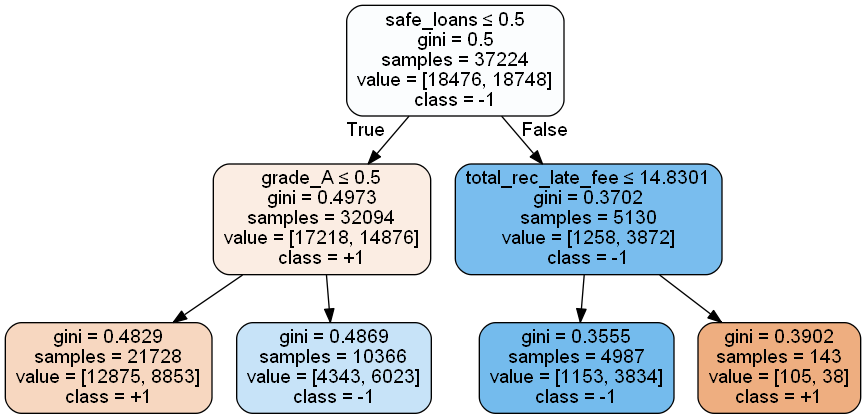

In [34]:
from sklearn import tree
import graphviz 
from os import system

dot_data = tree.export_graphviz(small_model, out_file='simple_tree.dot',
                               feature_names=train_data.columns,  
                         class_names=['+1','-1'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
system("dot -Tpng simple_tree.dot -o simple_tree.png")

from IPython.display import Image
Image(filename='simple_tree.png') 


## Making predictions
Let's consider two positive and two negative examples from the validation set and see what the model predicts. We will do the following:

- Predict whether or not a loan is safe.
- Predict the probability that a loan is safe.

### 11. First, let's grab 2 positive examples and 2 negative examples

In [28]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data


,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,0,1,0


### 12. Now, we will use our model to predict whether or not a loan is likely to default.

In [29]:
sample_validation_data_Y = sample_validation_data['safe_loans'].as_matrix()
sample_validation_data_X = sample_validation_data.drop('safe_loans', axis=1).as_matrix()
print sample_validation_data_Y.shape
print sample_validation_data_X.shape

(4L,)
(4L, 67L)


In [30]:
decision_tree_model.predict(sample_validation_data_X)

array([ 1, -1, -1,  1], dtype=int64)

## Quiz Question 1: 
What percentage of the predictions on sample_validation_data did decision_tree_model get correct?

## Answer: 
0.5

## Explore probability predictions

## 13. For each row in the sample_validation_data, what is the probability (according decision_tree_model) of a loan being classified as safe? (Hint: if you are using scikit-learn, you can use the .predict_proba() method)

In [31]:
decision_tree_model.predict_proba(sample_validation_data_X)

array([[ 0.34156543,  0.65843457],
       [ 0.53630646,  0.46369354],
       [ 0.64750958,  0.35249042],
       [ 0.20789474,  0.79210526]])

## Quiz Question 2:
Which loan has the highest probability of being classified as a safe loan?

## Answer: 
4

## Tricky predictions!

### 14. Now, we will explore something pretty interesting. For each row in the sample_validation_data, what is the probability (according to small_model) of a loan being classified as safe?

In [32]:
small_model.predict_proba(sample_validation_data_X)

array([[ 0.41896585,  0.58103415],
       [ 0.59255339,  0.40744661],
       [ 0.59255339,  0.40744661],
       [ 0.23120112,  0.76879888]])

## Quiz Question 3: 
Notice that the probability preditions are the exact same for the 2nd and 3rd loans. Why would this happen?

## Quiz Question 4: 
Based on the visualized tree, what prediction would you make for this data point (according to small_model)? (If you don't have Graphviz, you can answer this quiz question by executing the next part.)

### 15. Now, verify your prediction by examining the prediction made using small_model.

## Evaluating accuracy of the decision tree model

### 16. Evaluate the accuracy of small_model and decision_tree_model on the training data. (Hint: if you are using scikit-learn, you can use the .score() method)

In [36]:
small_model.score(train_X, train_Y)

0.61350204169353106

In [37]:
decision_tree_model.score(train_X, train_Y)

0.64052761659144641

### 17. Now, evaluate the accuracy of the small_model and decision_tree_model on the entire validation_data, not just the subsample considered above.

In [38]:
validation_Y = validation_data['safe_loans'].as_matrix()
validation_X = validation_data.drop('safe_loans', axis=1).as_matrix()
print validation_Y.shape
print validation_X.shape

(9284L,)
(9284L, 67L)


In [40]:
small_model.score(validation_X, validation_Y)

0.61934510986643687

In [41]:
decision_tree_model.score(validation_X, validation_Y)

0.63614821197759586

## Quiz Question 5: 
What is the accuracy of decision_tree_model on the validation set, rounded to the nearest .01?

## Answer:
0.64

## Evaluating accuracy of a complex decision tree model

### 18. Using sklearn.tree.DecisionTreeClassifier, train a decision tree with maximum depth = 10. Call this model big_model.

In [43]:
big_model = DecisionTreeClassifier(max_depth=10)
big_model = big_model.fit(train_X, train_Y)

### 19. Evaluate the accuracy of big_model on the training set and validation set.

In [44]:
big_model.score(train_X, train_Y)

0.66379217709004945

In [45]:
big_model.score(validation_X, validation_Y)

0.62699267557087457

## Quiz Question 6: 
How does the performance of big_model on the validation set compare to decision_tree_model on the validation set? Is this a sign of overfitting?

## Answer:
Yes

## Quantifying the cost of mistakes

In [48]:
predictions = decision_tree_model.predict(validation_X)
print type(predictions)
print type(validation_Y)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [55]:
false_positives = ((predictions==1) * (validation_Y==-1)).sum()
print false_positives

1661


In [56]:
false_negatives = ((predictions==-1) * (validation_Y==1)).sum()
print false_negatives

1717


In [57]:
correct_predictions = (predictions==validation_Y).sum()
print correct_predictions

5906


In [58]:
print 10000 * false_negatives + 20000 * false_positives

50390000
